In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

In [2]:
df=pd.read_csv("Instagram data.csv", encoding="latin1")
df.head()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows,Caption,Hashtags
0,3920,2586,1028,619,56,98,9,5,162,35,2,Here are some of the most important data visua...,#finance #money #business #investing #investme...
1,5394,2727,1838,1174,78,194,7,14,224,48,10,Here are some of the best data science project...,#healthcare #health #covid #data #datascience ...
2,4021,2085,1188,0,533,41,11,1,131,62,12,Learn how to train a machine learning model an...,#data #datascience #dataanalysis #dataanalytic...
3,4528,2700,621,932,73,172,10,7,213,23,8,Heres how you can write a Python program to d...,#python #pythonprogramming #pythonprojects #py...
4,2518,1704,255,279,37,96,5,4,123,8,0,Plotting annotations while visualizing your da...,#datavisualization #datascience #data #dataana...


In [3]:
df.isnull().sum()

Impressions       0
From Home         0
From Hashtags     0
From Explore      0
From Other        0
Saves             0
Comments          0
Shares            0
Likes             0
Profile Visits    0
Follows           0
Caption           0
Hashtags          0
dtype: int64

In [4]:
df=df.dropna()

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Impressions     119 non-null    int64 
 1   From Home       119 non-null    int64 
 2   From Hashtags   119 non-null    int64 
 3   From Explore    119 non-null    int64 
 4   From Other      119 non-null    int64 
 5   Saves           119 non-null    int64 
 6   Comments        119 non-null    int64 
 7   Shares          119 non-null    int64 
 8   Likes           119 non-null    int64 
 9   Profile Visits  119 non-null    int64 
 10  Follows         119 non-null    int64 
 11  Caption         119 non-null    object
 12  Hashtags        119 non-null    object
dtypes: int64(11), object(2)
memory usage: 12.2+ KB


In [6]:
df.describe()

,Impressions,From Home,From Hashtags,From Explore,From Other,Saves,Comments,Shares,Likes,Profile Visits,Follows
count,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000,119.000000
mean,5703.991597,2475.789916,1887.512605,1078.100840,171.092437,153.310924,6.663866,9.361345,173.781513,50.621849,20.756303
std,4843.780105,1489.386348,1884.361443,2613.026132,289.431031,156.317731,3.544576,10.089205,82.378947,87.088402,40.921580
min,1941.000000,1133.000000,116.000000,0.000000,9.000000,22.000000,0.000000,0.000000,72.000000,4.000000,0.000000
25%,3467.000000,1945.000000,726.000000,157.500000,38.000000,65.000000,4.000000,3.000000,121.500000,15.000000,4.000000
50%,4289.000000,2207.000000,1278.000000,326.000000,74.000000,109.000000,6.000000,6.000000,151.000000,23.000000,8.000000
75%,6138.000000,2602.500000,2363.500000,689.500000,196.000000,169.000000,8.000000,13.500000,204.000000,42.000000,18.000000
max,36919.000000,13473.000000,11817.000000,17414.000000,2547.000000,1095.000000,19.000000,75.000000,549.000000,611.000000,260.000000


### Data Analysis & Visualisation

Text(0.5, 1.0, 'Distribution of impresion from home')

<Figure size 1000x800 with 0 Axes>

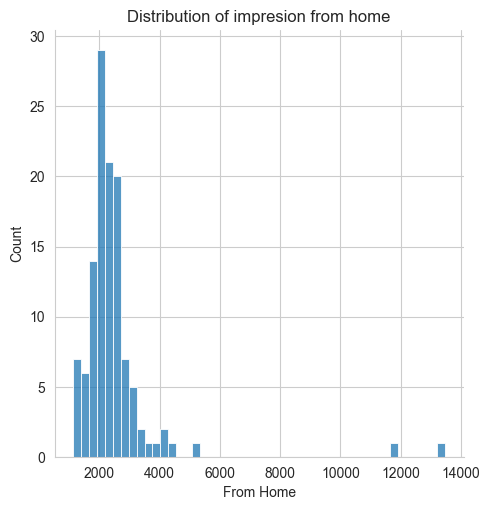

In [7]:
sns.set_style('whitegrid')
plt.figure(figsize=(10,8))
sns.displot(x='From Home',data=df)
plt.title('Distribution of impresion from home')


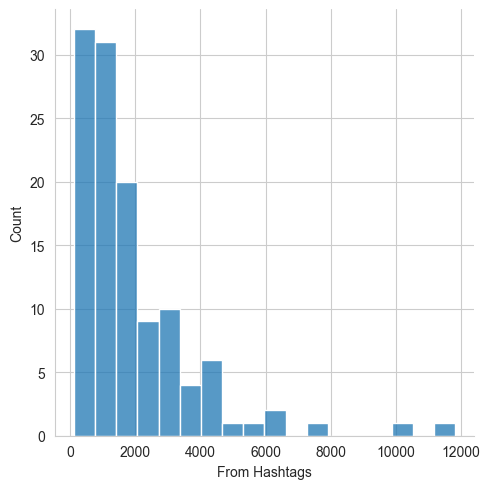

In [8]:

sns.displot(x='From Hashtags',data=df)

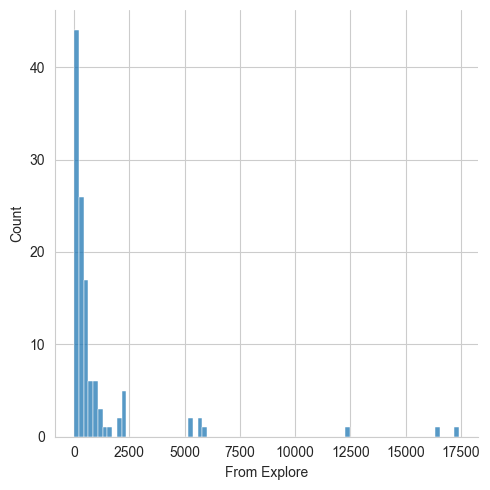

In [9]:
sns.displot(df['From Explore'])

In [10]:
home=df['From Home'].sum()
hastags=df['From Hashtags'].sum()
explore=df['From Explore'].sum()
others=df['From Other'].sum()

In [11]:
labels=['From Home','From Hashtags', 'From Explore', 'From Other']
values=[home,hastags,explore,others]

In [12]:
px.pie(df,values=values, names=labels, title='Impression of IG Posts',hole=0.5)

In [13]:
text=" ".join( i for i in df.Caption)
stopwords=set(STOPWORDS)
wordCloud= WordCloud(stopwords=stopwords, background_color='white').generate(text)


(-0.5, 399.5, 199.5, -0.5)

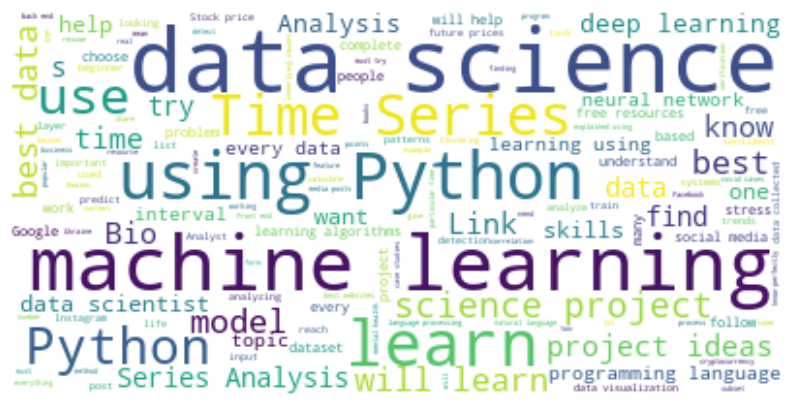

In [31]:
plt.figure(figsize=(10,10))
plt.imshow(wordCloud,interpolation='bilinear')

plt.axis('off')

(-0.5, 399.5, 199.5, -0.5)

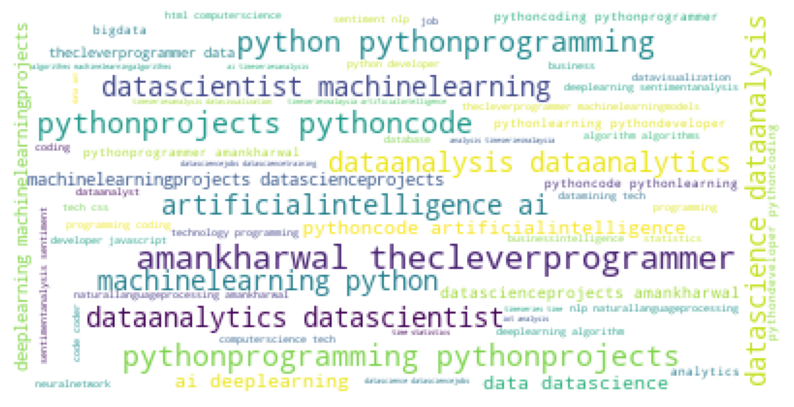

In [15]:
text=" ".join(i for i in df.Hashtags)
wordcloud=WordCloud(stopwords=stopwords,background_color='white').generate(text)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')

<AxesSubplot: xlabel='Likes', ylabel='Impressions'>

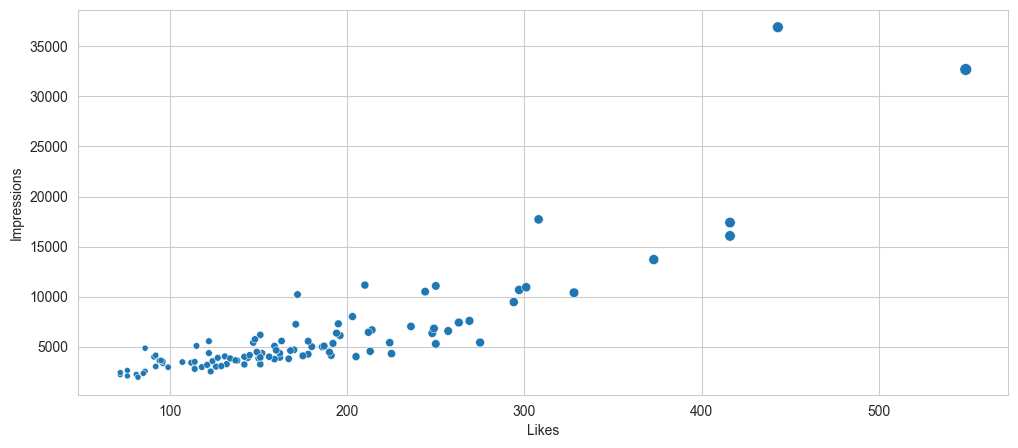

In [33]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Likes', y='Impressions',data=df,size='Likes',legend=False)

In [17]:
px.scatter(data_frame=df,x='Impressions',y='Comments', size='Comments')

In [34]:
px.scatter(data_frame=df,x='Impressions',y='Shares', size='Shares',trendline='ols')

In [35]:
px.scatter(data_frame=df,x='Impressions',y='Saves', size='Saves',trendline='ols')

In [36]:
px.scatter(data_frame=df,x='Profile Visits',y='Follows', size='Follows',trendline='ols')

### Analysing the profile stats

In [21]:
df.corr()['Impressions'].sort_values(ascending=False)

C:\Users\swapn\AppData\Local\Temp\ipykernel_6692\780055283.py:1: FutureWarning:

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.



Impressions       1.000000
From Explore      0.893607
Follows           0.889363
Likes             0.849835
From Home         0.844698
Saves             0.779231
Profile Visits    0.760981
Shares            0.634675
From Other        0.592960
From Hashtags     0.560760
Comments         -0.028524
Name: Impressions, dtype: float64

In [22]:
conversion_rate=(df['Follows'].sum()/df['Profile Visits'].sum())*100
conversion_rate

#41% conversion rate

41.00265604249668

In [23]:
X=df[['Likes','Comments','Follows','Shares',"Profile Visits",'Saves']].values
y=df['Impressions'].values

In [24]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveRegressor
from sklearn.metrics import mean_squared_error,f1_score

In [25]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=2)

In [26]:
model=PassiveAggressiveRegressor()
model.fit(X_train,y_train)
pred=model.predict(X_test)


In [27]:
model.score(X_test,y_test)

0.5124465619836339

In [28]:
df.iloc[0]

Impressions                                                    3920
From Home                                                      2586
From Hashtags                                                  1028
From Explore                                                    619
From Other                                                       56
Saves                                                            98
Comments                                                          9
Shares                                                            5
Likes                                                           162
Profile Visits                                                   35
Follows                                                           2
Caption           Here are some of the most important data visua...
Hashtags          #finance #money #business #investing #investme...
Name: 0, dtype: object

In [29]:
a=np.array([[5,98,35,9,162,56]])
a

array([[  5,  98,  35,   9, 162,  56]])

In [30]:
model.predict(a)

array([2887.27739833])